In [425]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8


In [426]:
#LOAD POWER
power = pd.read_csv('gen_and_use1.csv', parse_dates=['M_DATE','M_DATE_DAY'])
power = power.drop(power[power.E_USE_FACT == 0].index).set_index('M_DATE')
power['DAY'] = power.index.year * 1000 + power.index.dayofyear
power['M_DATE'] = power.index

In [427]:
#LOAD TEMPERATURE
temp = pd.read_csv('temperature.csv', parse_dates=[0])
#temp = temp.drop_duplicates()
temp['DAY'] = temp.M_DATE.dt.year * 1000 + temp.M_DATE.dt.dayofyear
temp = temp[temp.M_DATE <= power.M_DATE.max()]
#temp = temp.set_index('M_DATE')

In [428]:
power = pd.merge(power,temp[['DAY','TEMP']], how='left', on='DAY').set_index('M_DATE')

In [429]:
power.tail(20)

,INTERVAL,M_DATE_DAY,PRICE_ZONE_ID,POWER_SYS_ID,E_USE_FACT,E_USE_PLAN,GEN_FACT,GEN_PLAN,DAY,TEMP
M_DATE,,,,,,,,,,
2020-11-27 04:00:00,4,2020-11-27,1,550000,11462,11458,11339,11231,2020332,1.3
2020-11-27 05:00:00,5,2020-11-27,1,550000,12093,12041,11960,11711,2020332,1.3
2020-11-27 06:00:00,6,2020-11-27,1,550000,13076,12999,12591,12459,2020332,1.3
2020-11-27 07:00:00,7,2020-11-27,1,550000,13688,13596,12997,12876,2020332,1.3
2020-11-27 08:00:00,8,2020-11-27,1,550000,14405,14310,14291,14515,2020332,1.3
2020-11-27 09:00:00,9,2020-11-27,1,550000,14550,14546,15056,14993,2020332,1.3
2020-11-27 10:00:00,10,2020-11-27,1,550000,14442,14482,14969,14836,2020332,1.3
2020-11-27 11:00:00,11,2020-11-27,1,550000,14213,14238,14966,14836,2020332,1.3
2020-11-27 12:00:00,12,2020-11-27,1,550000,14123,14141,15028,14693,2020332,1.3


<AxesSubplot:xlabel='M_DATE'>

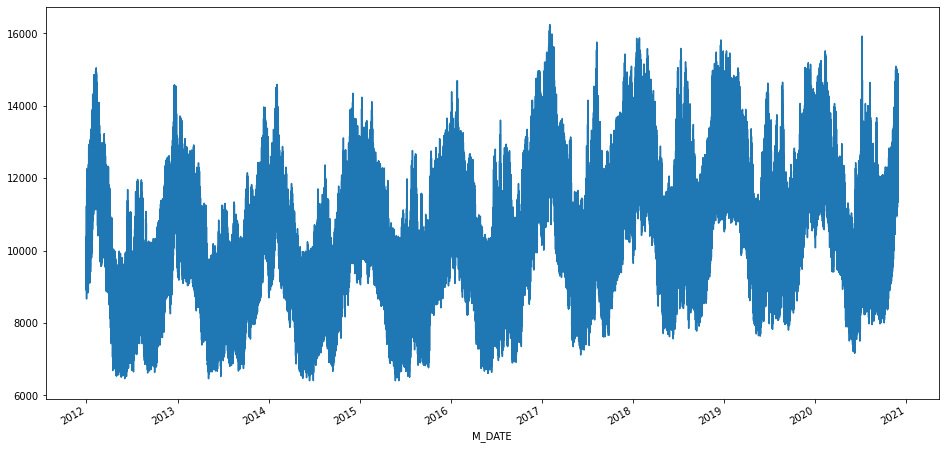

In [430]:
power.E_USE_FACT.plot()

<AxesSubplot:xlabel='M_DATE'>

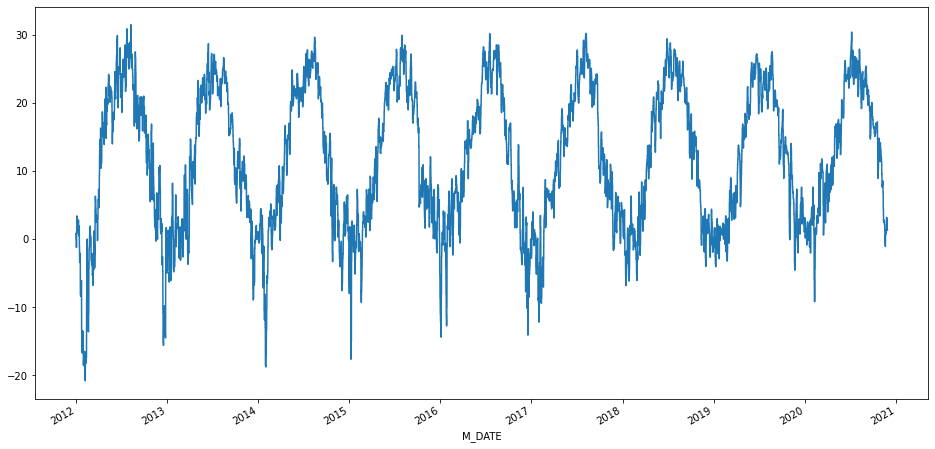

In [431]:
power.TEMP.plot()

<AxesSubplot:xlabel='date'>

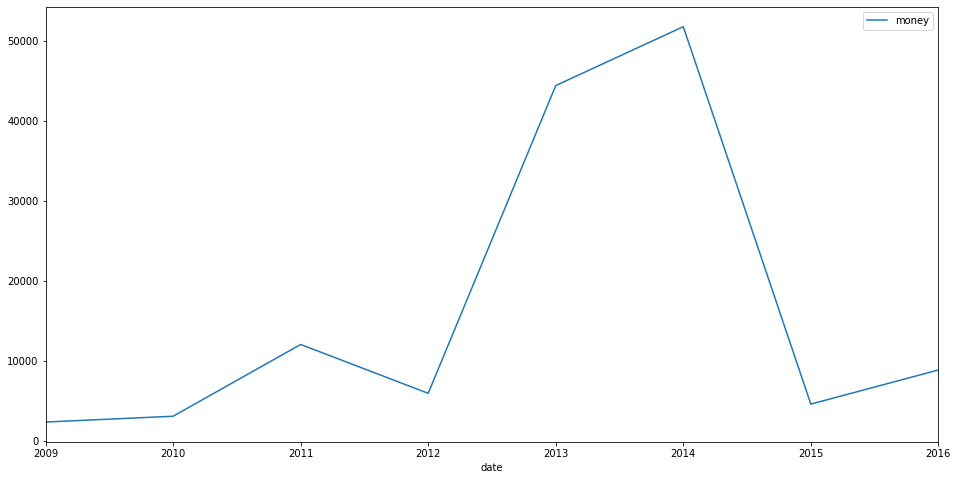

In [412]:
peoples = pd.DataFrame({ \
    'date': ['2018-06-01','2019-06-01'],
    'peoples': [709429,723100]
})

invest = pd.DataFrame({ \
    'date': ['2009-06-01','2010-06-01','2011-06-01', '2012-06-01','2013-06-01','2014-06-01','2015-06-01','2016-06-01'],
    'money': [2332.1,3057.9,12035.7,5924.9,44427.5,51795.5,4574.9,8843.8]
 })
invest['date'] = pd.to_datetime(invest['date'])
invest = invest.set_index('date')
invest.plot()

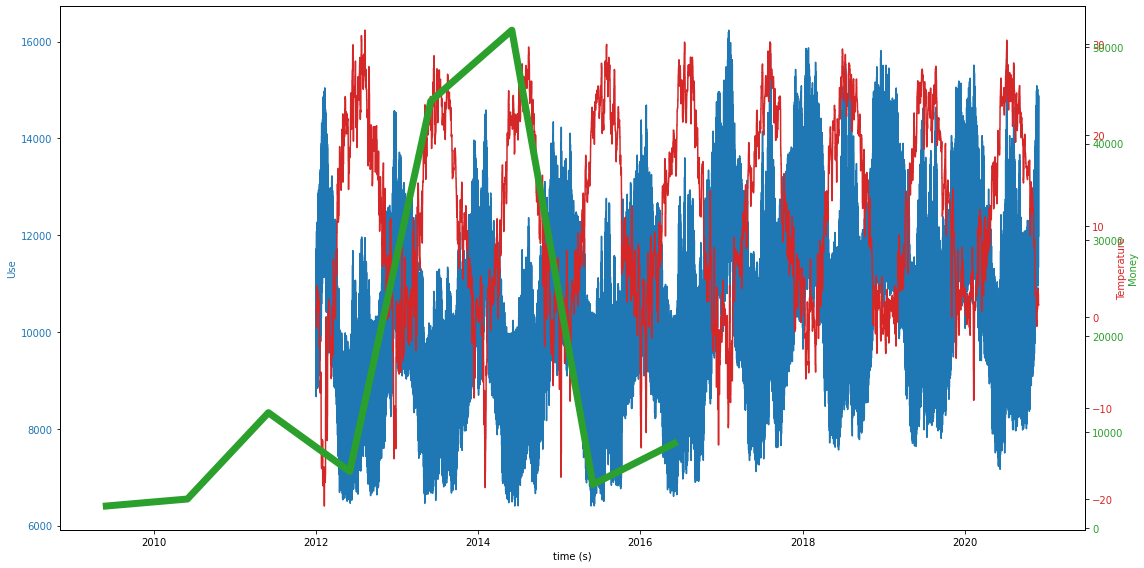

In [432]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Use', color=color)
ax1.plot(power.index, power.E_USE_FACT, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(power.index, power.TEMP, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax3.set_ylabel('Money', color=color)  # we already handled the x-label with ax1
ax3.plot(invest.index, invest.money, color=color,linewidth=7.0)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:>

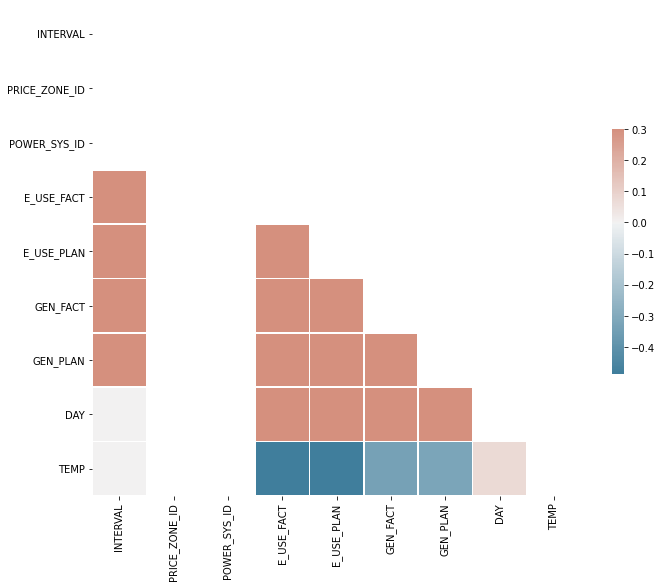

In [362]:
# Compute the correlation matrix
corr = power.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='M_DATE'>

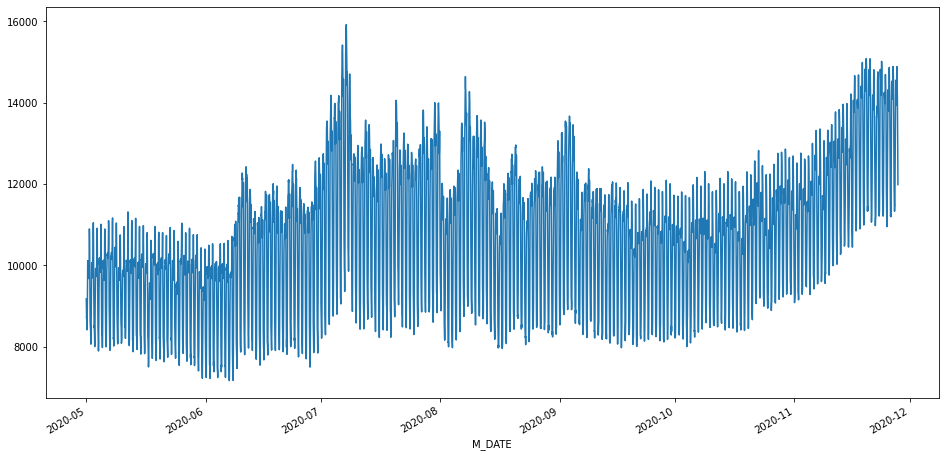

In [441]:
t1 = '2020-07-01'
t2 = '2020-08-10'
t1 = '2016-09-01'
t2 = '2017-05-10'
t1 = '2020-05-01'
t2 = '2020-12-10'


df = power[ (power.index >= t1) & (power.index <= t2)]
df.E_USE_FACT.plot()

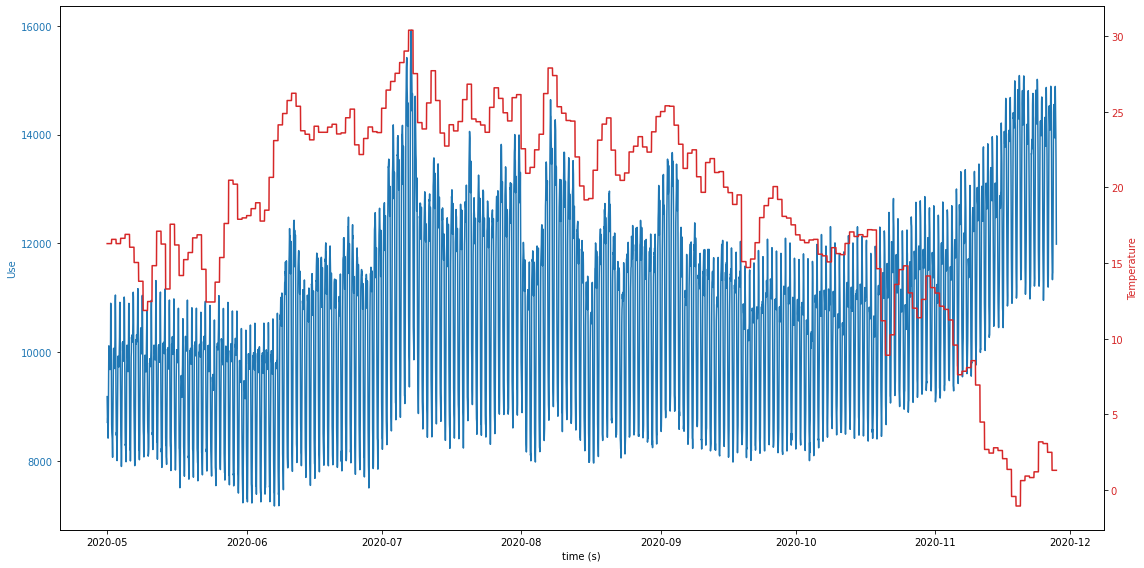

In [442]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Use', color=color)
ax1.plot(df.index, df.E_USE_FACT, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df.TEMP, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [206]:
temp.head()

,M_DATE,TEMP,DAY
0,2012-01-01,0.80,2012001
1,2012-02-01,0.21,2012032
2,2012-03-01,-1.21,2012061
3,2012-04-01,1.18,2012092
4,2012-05-01,3.40,2012122


<AxesSubplot:xlabel='M_DATE'>

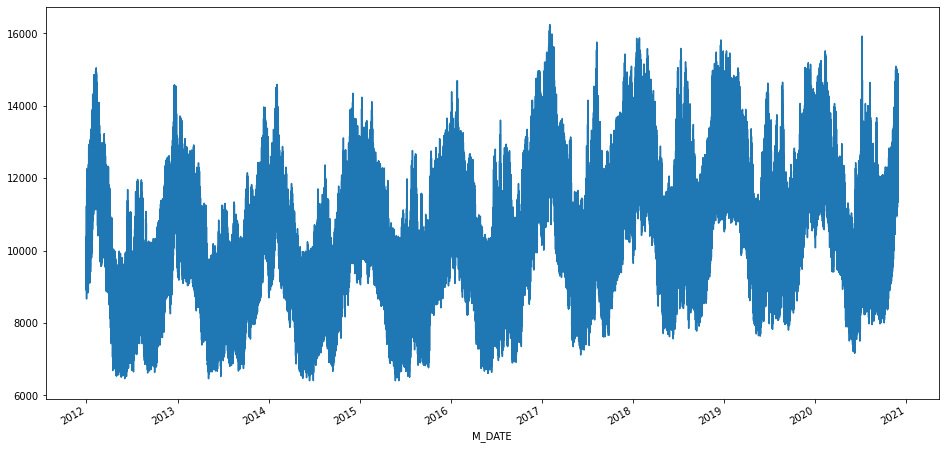

In [207]:
power.E_USE_FACT.plot()

<AxesSubplot:xlabel='M_DATE'>

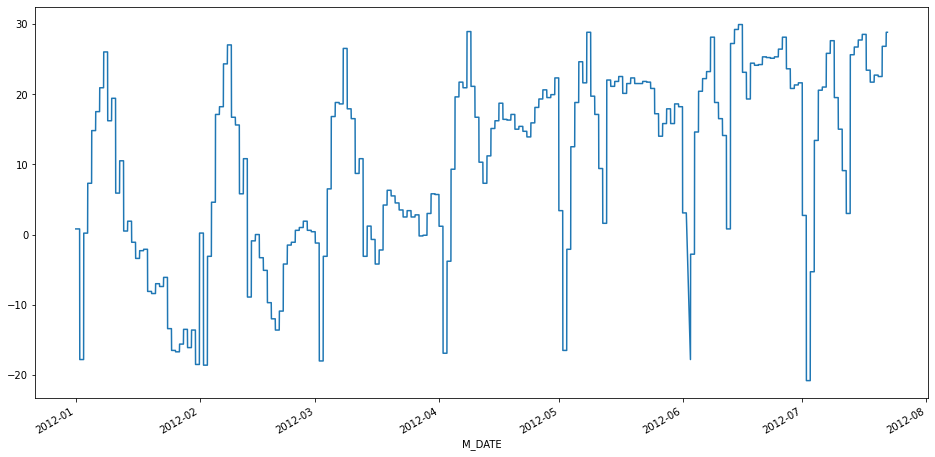

In [213]:
power[:5000].TEMP.plot()

<AxesSubplot:xlabel='M_DATE'>

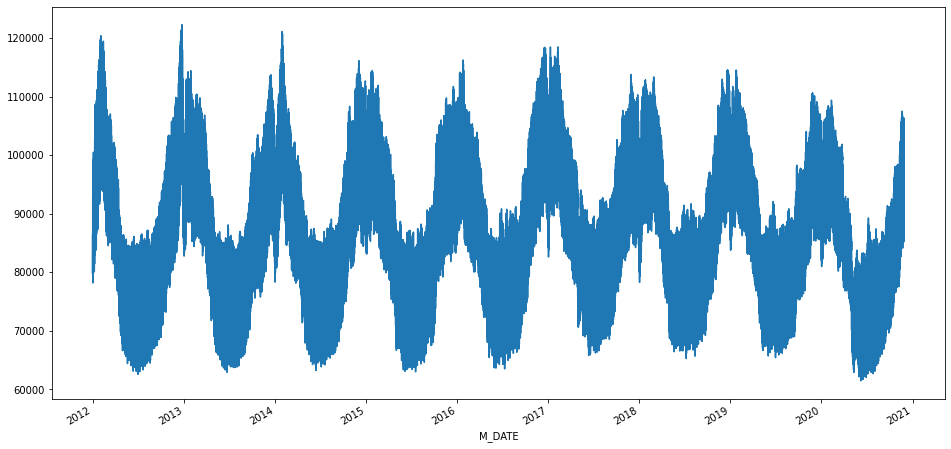

In [175]:
power.E_USE_FACT.plot()


In [10]:
power.E_USE_FACT.plot()

INTERVAL         0
M_DATE           0
PRICE_ZONE_ID    0
POWER_SYS_ID     0
E_USE_FACT       0
E_USE_PLAN       0
GEN_FACT         0
GEN_PLAN         0
dtype: int64

In [57]:
from datetime import datetime

d = '2012-01-01T00:02:00+04:00'
datetime.strptime(d, '%Y-%m-%dT%H:%M:%S%z').strftime('%Y-%m-%d %H:%M:%S'),

('2012-01-01 00:02:00',)